In [ ]:
pip install biopython

In [ ]:
import pickle
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
RutaCollectTF ="/content/drive/MyDrive/Reto/CollecTF"
RutaRegulonDB = "/content/drive/MyDrive/Reto/RegulonDB"
# Cargar el archivo desde tu Drive
prueba = pd.read_csv('/content/test.csv')  # Ajusta la ruta

In [ ]:
prueba['sequence']=prueba['id\tSequence\tis_tfbs']
prueba=prueba.drop('id\tSequence\tis_tfbs',axis=1)
# Función para extraer solo las letras mayúsculas
def extract_uppercase(seq_str):
    # Encontrar todas las secuencias consecutivas de letras mayúsculas
    matches = re.findall(r'[A-Z]+', seq_str)
    # Unir todas las partes encontradas (en caso de haber múltiples segmentos)
    return ''.join(matches)

# Aplicar la función a la columna 'sequence'
prueba['sequence'] = prueba['sequence'].apply(extract_uppercase)
# Eliminar S solo al inicio
prueba['sequence'] = prueba['sequence'].str.replace('^S', '', regex=True)
# Mostrar el resultado
print(prueba.head())

             sequence
0  CGTAAAGTTTTCCTTACG
1    GTAACTCGCAATTAAC
2    TTAATGTTTCGTTAAC
3     GGCGATTTATCGCGC
4     GTTTAAATTTTGACT


In [ ]:


#Procesamos los archivos de CollectTf
#Lee cada archivo, extrae cada línea y acumula en una lista
secuenciasCollectTF = []
for nombre in os.listdir(RutaCollectTF):
    if nombre.endswith('.fasta'):               # solo procesar .fasta
        ruta_completa = os.path.join(RutaCollectTF, nombre)
        with open(ruta_completa, 'r') as f:
            for line in f:
                seq = line.strip()
                if seq and not seq.startswith('>'):  # opcional: ignorar encabezados
                    secuenciasCollectTF.append(seq)

CollectTF = pd.DataFrame({'sequence': secuenciasCollectTF})
print(CollectTF.head())
print(f"Total de secuencias: {len(CollectTF)}")


     sequence
0  TGGCCGGATT
1  TGGCGACATT
2  GGGCCGATTC
3  TGGCTCGAAT
4  TGGCGCGAAA
Total de secuencias: 5350


In [ ]:
secuenciasRegulonDB = []
for nombre in os.listdir(RutaRegulonDB):
    if nombre.endswith('.faa'):               # solo procesar .faa
        ruta_completa = os.path.join(RutaRegulonDB, nombre)
        with open(ruta_completa, 'r') as f:
            for line in f:
                seq = line.strip()
                if seq and not seq.startswith('>'):  # opcional: ignorar encabezados
                    # Eliminar todas las letras minúsculas usando regex
                    seq_solo_mayusculas = re.sub('[a-z]', '', seq)
                    secuenciasRegulonDB.append(seq_solo_mayusculas)

RegulonDB = pd.DataFrame({'sequence': secuenciasRegulonDB})
print(RegulonDB.head())
print(f"Total de secuencias: {len(RegulonDB)}")

                   sequence
0  TGCTGGATAAGAATGTTTTAGCAA
1  GCGCTTTAATTTTTTTCGCTGACA
2  ACGCAAAAACCAACAATCTTGCGC
3  GCGCTTTGCTTTCATATTCCGGTT
4  TACATACATTCACAAATGTATGTA
Total de secuencias: 2897


In [ ]:
#Eliminamos duplicados
CollectTF = CollectTF.drop_duplicates()
RegulonDB = RegulonDB.drop_duplicates()
#print(f"Total de secuencias: {len(CollectTF)}")
#print(f"Total de secuencias: {len(RegulonDB)}")

# — Supongamos que ya tienes tu df CollectTF con la columna 'sequence' —
copiaCollectTF = CollectTF.copy()
# 1) Añadir una columna con la longitud de cada secuencia
copiaCollectTF['length'] = copiaCollectTF['sequence'].str.len()

# —— OPCIÓN A: Conteo de secuencias por longitud ——
counts = copiaCollectTF['length'].value_counts().sort_index()
print("Frecuencia de secuencias por longitud:")
print(counts)


Frecuencia de secuencias por longitud:
length
6        4
7        6
9      207
10      33
11     100
12      24
13      30
14     638
15     217
16     264
17      51
18     172
19     129
20      68
21     145
22      34
23      19
24      23
25      16
26      15
27       4
28      18
29      19
30       4
31       1
32       3
33       2
34      12
36       1
37      10
38       3
40       3
42       1
43       2
45       1
46       2
47       1
48       1
49       1
50       1
53      25
54       1
55       1
59       1
60       1
62       2
63       1
70       2
91       1
164      1
Name: count, dtype: int64


Estadísticas de longitud de secuencias:
count    4674.000000
mean       17.166881
std         6.505456
min         2.000000
25%        14.000000
50%        16.000000
75%        20.000000
max       164.000000
Name: length, dtype: float64


/tmp/ipython-input-9-197401784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CollectTF['source']  = 'CollectTF'


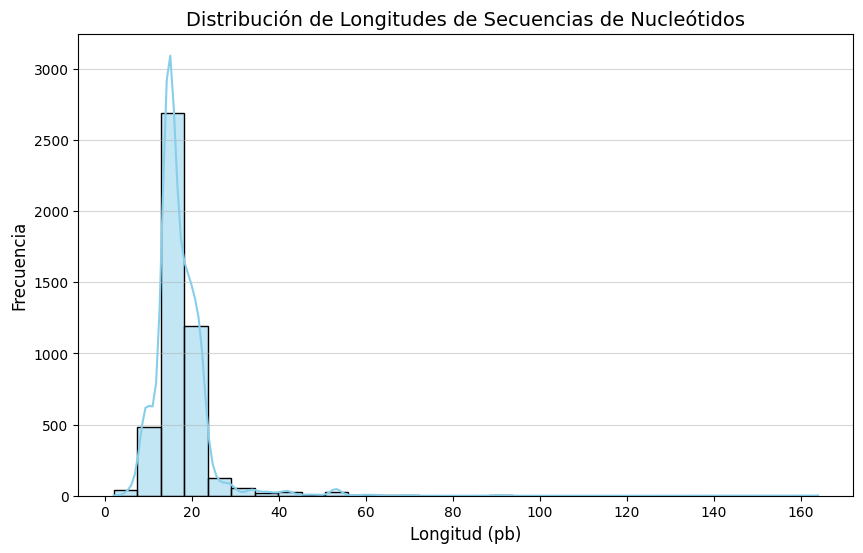

In [ ]:
#Para saber de dónde viene cada secuencia, añade antes una columna de origen:
CollectTF['source']  = 'CollectTF'
RegulonDB['source'] = 'RegulonDB'

# Ahora concaténalos en uno solo:
BDD = pd.concat([CollectTF, RegulonDB],
                ignore_index=True)
#Analisis de frecuencias de lass longitudes de las secuencias
# 1. Calcular longitudes
BDD['length'] = BDD['sequence'].str.len()

# 2. Mostrar estadísticas básicas
print("Estadísticas de longitud de secuencias:")
print(BDD['length'].describe())

# 3. Crear histograma
plt.figure(figsize=(10, 6))

# Usamos Seaborn para un histograma más estético
sns.histplot(BDD['length'], bins=30, kde=True, color='skyblue')

# Personalizar el gráfico
plt.title('Distribución de Longitudes de Secuencias de Nucleótidos', fontsize=14)
plt.xlabel('Longitud (pb)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.5)

In [ ]:
## GENERACIÓN DE DATOS NEGATIVOS
## ANTES DE HOMOGENIZAR LA LONGITUD DE LAS SECUENCIAS HE ACOMODADO DE FORMA ALEATORIA LAS CADENAS ORIGINALES PARA GENERAR LOS DATOS "NEGATIVOS"

# 3) Set por shuffling de cada secuencia real
#   - Si tus positivos ya están en BDD['sequence_fixed'], las usas.
#   - Aquí simplemente barajamos cada secuencia.
shuffled_seqs = []
for seq in BDD['sequence']:
    # convierto a lista, shuffle, uno de vuelta
    arr = list(seq)
    np.random.shuffle(arr)
    shuffled_seqs.append(''.join(arr))

# 4) Montar DataFrame de negativos con etiqueta
BDDNegativa= pd.DataFrame({'sequence': shuffled_seqs, 'TFBS': 0})
BDDNegativa

,sequence,TFBS
0,ACTGTGGCGT,0
1,TTCTGGAGAC,0
2,CCGGGTTCAG,0
3,CACTGGTAGT,0
4,GGACGGTCAA,0
...,...,...
4669,CCTCTAGATTACAAGAC,0
4670,TGTTGTTATTATCACGATACCAGG,0
4671,TGGCGCAGTTACATATACAAACAT,0
4672,GTATAATTCAAATGTTTCGAGACT,0


In [ ]:
#Usaremos la longitud de 25pb ya que es donde está la mayor cantidad de secuencias de nuestra muestra.
# 1) Define la función de padding/truncado
def fix_length(seq, L=25, pad_char='N'):
    n = len(seq)
    if n < L:
        # completa con N hasta L
        return seq + pad_char * (L - n)
    else:
        # si es igual o mayor, devuelve sólo los primeros L
        return seq[:L]

# 2) Aplica la función a ambos dataframes
BDD['sequence_fixed'] = BDD['sequence'].apply(lambda s: fix_length(s, 25))
BDDNegativa['sequence_fixed'] = BDDNegativa['sequence'].apply(lambda s: fix_length(s, 25))
prueba['sequence_fixed'] = prueba['sequence'].apply(lambda s: fix_length(s, 25))

# 3) (Opcional) Sobrescribe la columna original
BDD['sequence'] = BDD['sequence_fixed']
BDD = BDD.drop(columns='sequence_fixed')
BDDNegativa['sequence'] = BDDNegativa['sequence_fixed']
BDDNegativa = BDDNegativa.drop(columns='sequence_fixed')
prueba['sequence'] = prueba['sequence_fixed']
prueba = prueba.drop(columns='sequence_fixed')

BDD = BDD.drop('length', axis=1)
BDD = BDD.drop('source', axis=1)
BDD['TFBS'] = np.ones(len(BDD), dtype=int)
prueba

,sequence
0,CGTAAAGTTTTCCTTACGNNNNNNN
1,GTAACTCGCAATTAACNNNNNNNNN
2,TTAATGTTTCGTTAACNNNNNNNNN
3,GGCGATTTATCGCGCNNNNNNNNNN
4,GTTTAAATTTTGACTNNNNNNNNNN
...,...
58,TAACAATTAATGAATNNNNNNNNNN
59,GACAAGGTCCTAGAACGNNNNNNNN
60,TCTTACTCCTTTGAGTANNNNNNNN
61,TCCTCTATTGGCCTCCTNNNNNNNN


In [ ]:
Base = pd.concat([BDD, BDDNegativa], ignore_index=True)
Base = Base.sample(frac=1).reset_index(drop=True)
Base

,sequence,TFBS
0,AGAGCGCATGCAACAGNNNNNNNNN,0
1,TATTATTTACGGTGTGTTTAAACNN,1
2,AAACTAGTATTATCAAGTANNNNNN,0
3,TGAAAGCACTGCCANNNNNNNNNNN,1
4,TGGCATGATGGTCGCCAGNNNNNNN,1
...,...,...
9343,ATTTCATAAAATTTGNNNNNNNNNN,0
9344,AGGGGGAATAAATNNNNNNNNNNNN,0
9345,TCTAAATTTTCNNNNNNNNNNNNNN,1
9346,ATGGCACGTAACGCCAACCTNNNNN,1


In [ ]:
#Por frecuencia de ocurrencia haremos el encoding de las secuencias, según el artículo "Survey on Encoding Schemes for Genomic Data Representation and Feature Learning—From Signal Processing to Machine Learning" de Ning Yu, Zhihua Li, Zeng Yu tomaremos los valores de referencia
stability_values = {
    'AA': 0.097,
    'AT': 0.081,
    'TA': 0.067,
    'AG': 0.07,
    'GA': 0.061,
    'TT': 0.097,
    'AC': 0.054,
    'CA': 0.074,
    'TG': 0.074,
    'GT': 0.049,
    'TC': 0.057,
    'CT': 0.071,
    'CC': 0.047,
    'CG': 0.01,
    'GC': 0.043,
    'GG': 0.05,
    'C' : 0.27215,
    'T' : 0.20576,
    'A' : 0.24300,
    'G' : 0.27909,
    'N' : 0
}
# 2) Función que codifica una secuencia en pares
def encode_dds(seq, values):
    L = len(seq)
    # Para cada par i,i+1 obtenemos el valor o 0 si no está en el diccionario
    return [ values.get(seq[i:i+2].upper(), 0)
             for i in range(0, L-1) ]

# 3) Aplicar sobre tu DataFrame
#    Esto devuelve una Series de listas de longitud (len(seq)-1) cada una
encoded_series = Base['sequence'].apply(lambda s: encode_dds(s, stability_values))
encoded_prueba = prueba['sequence'].apply(lambda s: encode_dds(s, stability_values))

# 4) Convertir esas listas en columnas separadas
#    Determina cuántas columnas máximas necesitas
max_pairs = encoded_series.map(len).max()
col_names = [f'pair_{i+1}' for i in range(max_pairs)]
max_pairs_prueba = encoded_prueba.map(len).max()
col_names_prueba = [f'pair_{i+1}' for i in range(max_pairs_prueba)]

# 5) Crea un DataFrame “ancho” a partir de las listas
df_pairs = pd.DataFrame(encoded_series.tolist(), columns=col_names)
prueba_pairs = pd.DataFrame(encoded_prueba.tolist(), columns=col_names_prueba)

# 6) Une con tu DataFrame original
Base_dds = pd.concat([Base.reset_index(drop=True), df_pairs], axis=1)
prueba_dds = pd.concat([prueba.reset_index(drop=True), prueba_pairs], axis=1)
# Extraer la columna 'TFBS' y guardarla en una variable
tfbs_col = Base_dds.pop('TFBS')

# Añadirla nuevamente al final del DataFrame
Base_dds['TFBS'] = tfbs_col
Base_dds


,sequence,pair_1,pair_2,pair_3,pair_4,pair_5,pair_6,pair_7,pair_8,pair_9,...,pair_16,pair_17,pair_18,pair_19,pair_20,pair_21,pair_22,pair_23,pair_24,TFBS
0,AGAGCGCATGCAACAGNNNNNNNNN,0.070,0.061,0.070,0.043,0.010,0.043,0.074,0.081,0.074,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0
1,TATTATTTACGGTGTGTTTAAACNN,0.067,0.081,0.097,0.067,0.081,0.097,0.097,0.067,0.054,...,0.049,0.097,0.097,0.067,0.097,0.097,0.054,0.0,0.0,1
2,AAACTAGTATTATCAAGTANNNNNN,0.097,0.097,0.054,0.071,0.067,0.070,0.049,0.067,0.081,...,0.070,0.049,0.067,0.000,0.000,0.000,0.000,0.0,0.0,0
3,TGAAAGCACTGCCANNNNNNNNNNN,0.074,0.061,0.097,0.097,0.070,0.043,0.074,0.054,0.071,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,1
4,TGGCATGATGGTCGCCAGNNNNNNN,0.074,0.050,0.043,0.074,0.081,0.074,0.061,0.081,0.074,...,0.074,0.070,0.000,0.000,0.000,0.000,0.000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9343,ATTTCATAAAATTTGNNNNNNNNNN,0.081,0.097,0.097,0.057,0.074,0.081,0.067,0.097,0.097,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0
9344,AGGGGGAATAAATNNNNNNNNNNNN,0.070,0.050,0.050,0.050,0.050,0.061,0.097,0.081,0.067,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0
9345,TCTAAATTTTCNNNNNNNNNNNNNN,0.057,0.071,0.067,0.097,0.097,0.081,0.097,0.097,0.097,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,1
9346,ATGGCACGTAACGCCAACCTNNNNN,0.081,0.074,0.050,0.043,0.074,0.054,0.010,0.049,0.067,...,0.097,0.054,0.047,0.071,0.000,0.000,0.000,0.0,0.0,1


In [ ]:
prueba_dds=prueba_dds.drop('sequence', axis=1)
prueba_dds

,pair_1,pair_2,pair_3,pair_4,pair_5,pair_6,pair_7,pair_8,pair_9,pair_10,...,pair_15,pair_16,pair_17,pair_18,pair_19,pair_20,pair_21,pair_22,pair_23,pair_24
0,0.010,0.049,0.067,0.097,0.097,0.070,0.049,0.097,0.097,0.097,...,0.067,0.054,0.01,0.0,0.0,0,0,0,0,0
1,0.049,0.067,0.097,0.054,0.071,0.057,0.010,0.043,0.074,0.097,...,0.054,0.000,0.00,0.0,0.0,0,0,0,0,0
2,0.097,0.067,0.097,0.081,0.074,0.049,0.097,0.097,0.057,0.010,...,0.054,0.000,0.00,0.0,0.0,0,0,0,0,0
3,0.050,0.043,0.010,0.061,0.081,0.097,0.097,0.067,0.081,0.057,...,0.000,0.000,0.00,0.0,0.0,0,0,0,0,0
4,0.049,0.097,0.097,0.067,0.097,0.097,0.081,0.097,0.097,0.097,...,0.000,0.000,0.00,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.067,0.097,0.054,0.074,0.097,0.081,0.097,0.067,0.097,0.081,...,0.000,0.000,0.00,0.0,0.0,0,0,0,0,0
59,0.061,0.054,0.074,0.097,0.070,0.050,0.049,0.057,0.047,0.071,...,0.054,0.010,0.00,0.0,0.0,0,0,0,0,0
60,0.057,0.071,0.097,0.067,0.054,0.071,0.057,0.047,0.071,0.097,...,0.049,0.067,0.00,0.0,0.0,0,0,0,0,0
61,0.057,0.047,0.071,0.057,0.071,0.067,0.081,0.097,0.074,0.050,...,0.047,0.071,0.00,0.0,0.0,0,0,0,0,0


In [ ]:
BaseModelo = Base_dds.drop('sequence', axis=1)
BaseModelo

,pair_1,pair_2,pair_3,pair_4,pair_5,pair_6,pair_7,pair_8,pair_9,pair_10,...,pair_16,pair_17,pair_18,pair_19,pair_20,pair_21,pair_22,pair_23,pair_24,TFBS
0,0.070,0.061,0.070,0.043,0.010,0.043,0.074,0.081,0.074,0.043,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0
1,0.067,0.081,0.097,0.067,0.081,0.097,0.097,0.067,0.054,0.010,...,0.049,0.097,0.097,0.067,0.097,0.097,0.054,0.0,0.0,1
2,0.097,0.097,0.054,0.071,0.067,0.070,0.049,0.067,0.081,0.097,...,0.070,0.049,0.067,0.000,0.000,0.000,0.000,0.0,0.0,0
3,0.074,0.061,0.097,0.097,0.070,0.043,0.074,0.054,0.071,0.074,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,1
4,0.074,0.050,0.043,0.074,0.081,0.074,0.061,0.081,0.074,0.050,...,0.074,0.070,0.000,0.000,0.000,0.000,0.000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9343,0.081,0.097,0.097,0.057,0.074,0.081,0.067,0.097,0.097,0.097,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0
9344,0.070,0.050,0.050,0.050,0.050,0.061,0.097,0.081,0.067,0.097,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0
9345,0.057,0.071,0.067,0.097,0.097,0.081,0.097,0.097,0.097,0.057,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,1
9346,0.081,0.074,0.050,0.043,0.074,0.054,0.010,0.049,0.067,0.097,...,0.097,0.054,0.047,0.071,0.000,0.000,0.000,0.0,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# 1. Preparar los datos
X = BaseModelo.drop('TFBS', axis=1)  # Características (todos los pares)
y = BaseModelo['TFBS']               # Variable objetivo

# 2. Dividir en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3. Escalar características (opcional pero recomendado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Crear y entrenar el modelo de Random Forest
rf = RandomForestClassifier(
    n_estimators=350,      # Número de árboles
    max_depth=15,           # Profundidad máxima de los árboles
    min_samples_split=5,    # Mínimo muestras para dividir un nodo
    min_samples_leaf=2,     # Mínimo muestras en hoja
    max_features='sqrt',    # Características a considerar en cada división
    class_weight='balanced', # Balancear clases desbalanceadas
    random_state=42,
    n_jobs=-1               # Usar todos los núcleos del CPU
)

rf.fit(X_train_scaled, y_train)

# 5. Predecir y evaluar
y_pred = rf.predict(X_test_scaled)

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1169
           1       0.76      0.67      0.71      1168

    accuracy                           0.73      2337
   macro avg       0.73      0.73      0.73      2337
weighted avg       0.73      0.73      0.73      2337



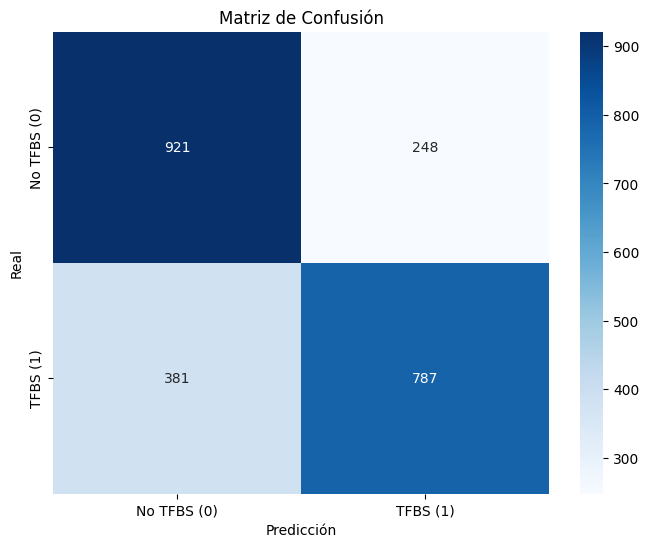

In [ ]:
# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No TFBS (0)', 'TFBS (1)'],
            yticklabels=['No TFBS (0)', 'TFBS (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()



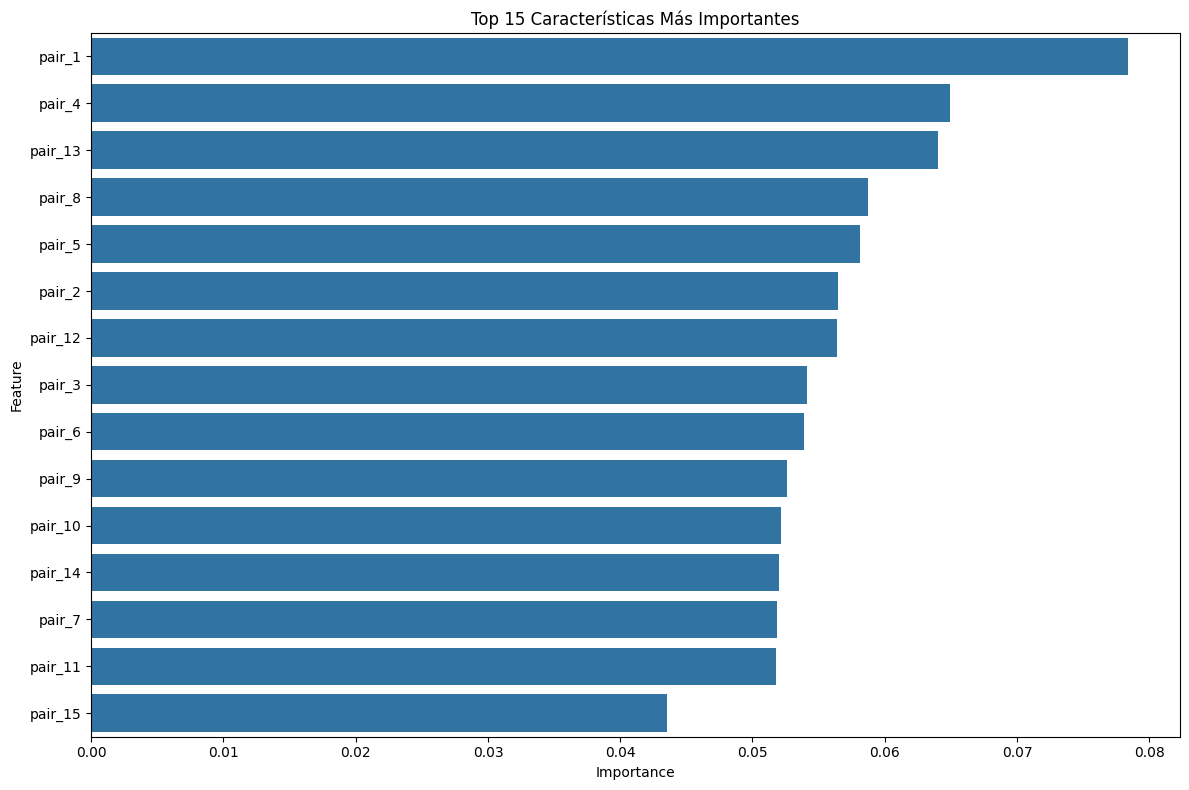

Puntuación F1 en validación cruzada: 0.7162 ± 0.0083


In [ ]:
# Importancia de características
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Características Más Importantes')
plt.tight_layout()
plt.show()

# 6. Guardar el modelo para uso futuro (opcional)
import joblib
joblib.dump(rf, 'modelo_random_forest.pkl')
joblib.dump(scaler, 'escalador.pkl')

# 7. Validación cruzada
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='f1')
print(f"Puntuación F1 en validación cruzada: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

In [ ]:
# 1) Asegúrate de que prueba_dds solo tenga las columnas pair_1…pair_24 (sin TFBS)
feature_cols = [c for c in BaseModelo.columns if c.startswith('pair_')]

# 2) Extrae X_new de prueba_dds
X_new = prueba_dds[feature_cols]

# 3) Escala con tu scaler ya ajustado
X_new_scaled = scaler.transform(X_new)

# 4) Predice clases y probabilidades
pred_labels = rf.predict(X_new_scaled)            # 0 o 1
pred_probs  = rf.predict_proba(X_new_scaled)[:, 1]  # P(clase=1)

# 5) Añádelos al DataFrame de prueba
prueba_dds = prueba_dds.copy()
prueba_dds['pred_TFBS'] = pred_labels
prueba_dds['prob_TFBS'] = pred_probs

# 6) Revisa el resultado
prueba_dds


,pair_1,pair_2,pair_3,pair_4,pair_5,pair_6,pair_7,pair_8,pair_9,pair_10,...,pair_17,pair_18,pair_19,pair_20,pair_21,pair_22,pair_23,pair_24,pred_TFBS,prob_TFBS
0,0.010,0.049,0.067,0.097,0.097,0.070,0.049,0.097,0.097,0.097,...,0.01,0.0,0.0,0,0,0,0,0,1,0.572853
1,0.049,0.067,0.097,0.054,0.071,0.057,0.010,0.043,0.074,0.097,...,0.00,0.0,0.0,0,0,0,0,0,0,0.460465
2,0.097,0.067,0.097,0.081,0.074,0.049,0.097,0.097,0.057,0.010,...,0.00,0.0,0.0,0,0,0,0,0,0,0.438527
3,0.050,0.043,0.010,0.061,0.081,0.097,0.097,0.067,0.081,0.057,...,0.00,0.0,0.0,0,0,0,0,0,1,0.678624
4,0.049,0.097,0.097,0.067,0.097,0.097,0.081,0.097,0.097,0.097,...,0.00,0.0,0.0,0,0,0,0,0,1,0.786757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.067,0.097,0.054,0.074,0.097,0.081,0.097,0.067,0.097,0.081,...,0.00,0.0,0.0,0,0,0,0,0,1,0.585658
59,0.061,0.054,0.074,0.097,0.070,0.050,0.049,0.057,0.047,0.071,...,0.00,0.0,0.0,0,0,0,0,0,0,0.291535
60,0.057,0.071,0.097,0.067,0.054,0.071,0.057,0.047,0.071,0.097,...,0.00,0.0,0.0,0,0,0,0,0,0,0.406193
61,0.057,0.047,0.071,0.057,0.071,0.067,0.081,0.097,0.074,0.050,...,0.00,0.0,0.0,0,0,0,0,0,0,0.493127


In [ ]:
# Crear el nuevo DataFrame 'prediccion'
prediccion = pd.DataFrame({
    'id': [f'Seq{str(i+1).zfill(3)}' for i in range(len(prueba_dds))],
    'is_TFBS': prueba_dds['pred_TFBS']  # Asegúrate que esta columna existe en prueba_dds
})

# Guardar en CSV
prediccion.to_csv('prediccion.csv', index=False, encoding='utf-8')
prediccion

,id,is_TFBS
0,Seq001,1
1,Seq002,0
2,Seq003,0
3,Seq004,1
4,Seq005,1
...,...,...
58,Seq059,1
59,Seq060,0
60,Seq061,0
61,Seq062,0


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1) Definir el modelo SVM
#    - kernel='rbf' es el más común por defecto
#    - C controla el trade-off margen/errores
#    - probability=True si quieres probabilidades de clase
svm = SVC(
    kernel='rbf',
    C=100,
    gamma='scale',    # 'scale' es un buen punto de partida
    class_weight='balanced',  # compensa desbalance de clases
    probability=True,
    random_state=42
)

# 2) Entrenar
svm.fit(X_train_scaled, y_train)

# 3) Predecir
y_pred_svm   = svm.predict(X_test_scaled)
y_proba_svm  = svm.predict_proba(X_test_scaled)[:,1]

# 4) Evaluar
print("Accuracy SVM:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Accuracy SVM: 0.6615318784766795

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      1169
           1       0.66      0.67      0.66      1168

    accuracy                           0.66      2337
   macro avg       0.66      0.66      0.66      2337
weighted avg       0.66      0.66      0.66      2337

Confusion Matrix:
 [[769 400]
 [391 777]]


In [ ]:
prediccion1 = pd.DataFrame({
    'id':       [f'Seq{str(i+1).zfill(3)}' for i in range(len(prueba_dds))],
    'is_TFBS':  prueba_dds['pred_TFBS']
    # Opcional: 'prob_TFBS': prueba_dds['prob_TFBS']
})

# Guardar a CSV
prediccion1.to_csv('prediccion1.csv', index=False, encoding='utf-8')

# Mostrar el resultado
print(prediccion1)

        id  is_TFBS
0   Seq001        1
1   Seq002        0
2   Seq003        0
3   Seq004        1
4   Seq005        1
..     ...      ...
58  Seq059        1
59  Seq060        0
60  Seq061        0
61  Seq062        0
62  Seq063        0

[63 rows x 2 columns]


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

# 1) Define pipeline (escalado + SVM)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, class_weight='balanced', random_state=42))
])

# 2) Parámetros a explorar
param_grid = {
    'svm__kernel': ['rbf', 'poly', 'sigmoid'],
    'svm__C':      [0.1, 1, 10, 100],
    'svm__gamma':  ['scale', 0.01, 0.1, 1],
    'svm__degree': [2, 3, 4]           # sólo usado si kernel='poly'
}

# 3) GridSearch con 5‑fold CV estratificado, optimizando precisión
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    pipe, param_grid,
    scoring='precision',    # para subir precision
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("Mejores params:", grid.best_params_)
print("Mejor precision CV:", grid.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
